# Prueba Técnica - DonDoctor
#### Modelo de Clasificación
##### Félix Eduardo Barahona Romero
##### url git: https://github.com/fedbaro/prueba_dondoctor.git
---

#### Predicción de enfermedad cardíaca 
##### Dataset público Kaggle: https://www.kaggle.com/datasets/data855/heart-disease
###### El dataset presenta un conjunto de datos de experimientos en Cleveland donde a partir de ciertos valores
###### de variables relacionadas con la condición de salud, se busca indicar si el paciente tiene riesgo de enfermedad cardíaca.
###### Mayor info sobre el dataset en la url de origen.
---

#### Importación librerias

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import minmax_scale
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE

# Figure settings
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("talk")

#### Carga de datos

In [2]:
#Carga de datos de train
pd.set_option('display.max_columns', None)
data = pd.read_csv("heart.csv")
data.head()

,edad,sexo,dolor_pecho,presion_arterial,colesterol,nivel_azucar_sangre,resultados_electrocardio,max_frecuencia_cardiaca,angina_inducidad_por_ejercicio,oldpeak,slope,vasos_coloreados_fluor,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Validación data y variables

In [3]:
# Verificamos que el dataframe no tenga valores nulos.
print(f'Total Datos null: {data.isnull().sum().max()}\n')
data_isnull = (round((data.isnull().sum() / data.shape[0])*100,2))
df_isnull= pd.DataFrame(data_isnull)
df_isnull['count_nulls'] = data.isnull().sum()
df_isnull['count_notnulls'] = data.notnull().sum()
df_isnull['total_fields'] = data.shape[0]
df_isnull.rename(columns = {0: 'percent_nulls'}, inplace=True)
df_isnull

Total Datos null: 0



,percent_nulls,count_nulls,count_notnulls,total_fields
edad,0.0,0,303,303
sexo,0.0,0,303,303
dolor_pecho,0.0,0,303,303
presion_arterial,0.0,0,303,303
colesterol,0.0,0,303,303
nivel_azucar_sangre,0.0,0,303,303
resultados_electrocardio,0.0,0,303,303
max_frecuencia_cardiaca,0.0,0,303,303
angina_inducidad_por_ejercicio,0.0,0,303,303
oldpeak,0.0,0,303,303


In [4]:
#Descripción de la data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sexo,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
dolor_pecho,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
presion_arterial,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
colesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
nivel_azucar_sangre,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
resultados_electrocardio,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
max_frecuencia_cardiaca,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
angina_inducidad_por_ejercicio,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [5]:
#Qué tipo de variable es cada una
data.dtypes

edad                                int64
sexo                                int64
dolor_pecho                         int64
presion_arterial                    int64
colesterol                          int64
nivel_azucar_sangre                 int64
resultados_electrocardio            int64
max_frecuencia_cardiaca             int64
angina_inducidad_por_ejercicio      int64
oldpeak                           float64
slope                               int64
vasos_coloreados_fluor              int64
thal                                int64
target                              int64
dtype: object

In [6]:
# Se verifican valores categoricos de la variable edad
data.edad.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: edad, dtype: int64

In [7]:
# Se verifican valores categoricos de la variable sexo
data.sexo.value_counts()

1    207
0     96
Name: sexo, dtype: int64

In [8]:
# Se verifican valores categoricos de la variable sexo
data.dolor_pecho.value_counts()

0    143
2     87
1     50
3     23
Name: dolor_pecho, dtype: int64

In [9]:
# Se verifican valores categoricos de la variable sexo
data.presion_arterial.value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: presion_arterial, dtype: int64

In [10]:
# Se verifican valores categoricos de la variable sexo
data.colesterol.value_counts()

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: colesterol, Length: 152, dtype: int64

In [11]:
# Se verifican valores categoricos de la variable sexo
data.nivel_azucar_sangre.value_counts()

0    258
1     45
Name: nivel_azucar_sangre, dtype: int64

In [12]:
# Se verifican valores categoricos de la variable sexo
data.resultados_electrocardio.value_counts()

1    152
0    147
2      4
Name: resultados_electrocardio, dtype: int64

In [13]:
# Se verifican valores categoricos de la variable sexo
data.max_frecuencia_cardiaca.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: max_frecuencia_cardiaca, Length: 91, dtype: int64

In [14]:
# Se verifican valores categoricos de la variable sexo
data.angina_inducidad_por_ejercicio.value_counts()

0    204
1     99
Name: angina_inducidad_por_ejercicio, dtype: int64

In [15]:
# Se verifican valores categoricos de la variable sexo
data.oldpeak.value_counts()

0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: oldpeak, dtype: int64

In [16]:
# Se verifican valores categoricos de la variable sexo
data.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [17]:
# Se verifican valores categoricos de la variable sexo
data.vasos_coloreados_fluor.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: vasos_coloreados_fluor, dtype: int64

In [18]:
# Se verifican valores categoricos de la variable sexo
data.thal.value_counts()

#No se identifican outliers en variables predictoras

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [19]:
#Chequeamos balanceo del dataset, porcentaje variable target.
print("Porcentaje riesgo cardíaco:", round(data.target.value_counts()[1]/data.shape[0]*100, 2),"%")
print("Porcentaje sin riesgo cardíaco:", round(data.target.value_counts()[0]/data.shape[0]*100, 2),"%")

data.target.value_counts()
#El dataset se encuentra balanceado para realizar predict

Porcentaje riesgo cardíaco: 54.46 %
Porcentaje sin riesgo cardíaco: 45.54 %


1    165
0    138
Name: target, dtype: int64

## Estudio de variables y correlaciones

Text(0.5, 1.0, 'Null')

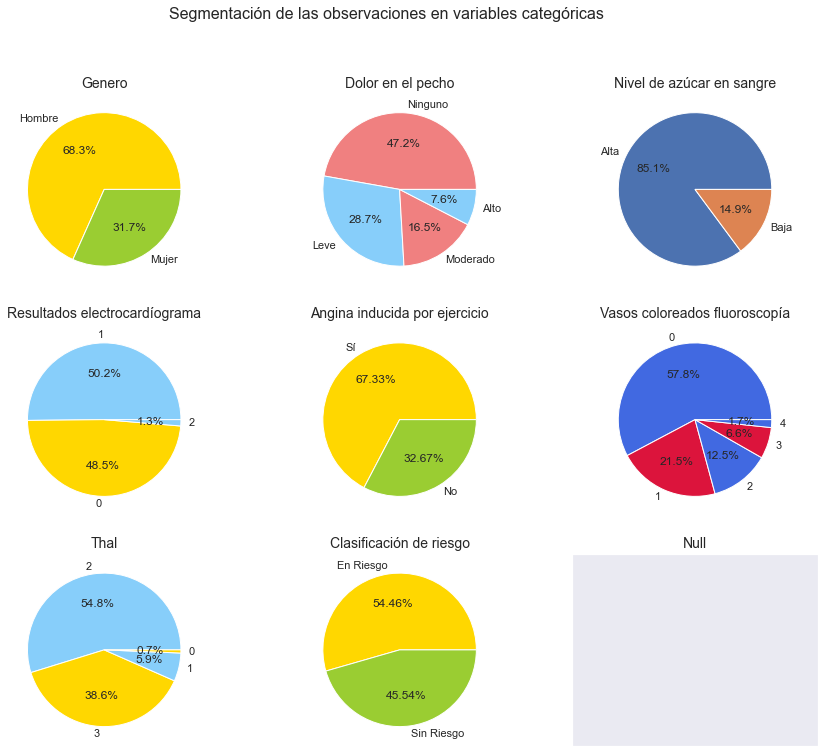

In [69]:
# Subplots segmentación variables categoricas

#Creación datasets cuenta de valores por variable
df_sexo = pd.DataFrame(data.sexo.value_counts())
df_dolor_pecho = pd.DataFrame(data.dolor_pecho.value_counts())
df_azucar = pd.DataFrame(data.nivel_azucar_sangre.value_counts())
df_electro = pd.DataFrame(data.resultados_electrocardio.value_counts())
df_angina = pd.DataFrame(data.angina_inducidad_por_ejercicio.value_counts())
df_vasos = pd.DataFrame(data.vasos_coloreados_fluor.value_counts())
df_thal = pd.DataFrame(data.thal.value_counts())
df_target = pd.DataFrame(data.target.value_counts())

#Tupla de colores
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

#Se crea matriz de subplots
fig, ax = plt.subplots(3, 3, sharex = 'col', sharey = 'row', figsize=(15, 12))
plt.suptitle('Segmentación de las observaciones en variables categóricas',fontsize=16)

#Plots por variables
ax[0, 0].pie(df_sexo.sexo, labels=['Hombre', 'Mujer'], autopct='%1.1f%%', colors= colors)
ax[0, 0].set_title("Genero", fontsize=14)

ax[0, 1].pie(df_dolor_pecho.dolor_pecho, labels=['Ninguno', 'Leve', 'Moderado', 'Alto'], autopct='%1.1f%%', colors= ['lightcoral', 'lightskyblue'])
ax[0, 1].set_title("Dolor en el pecho", fontsize=14)

ax[0, 2].pie(df_azucar.nivel_azucar_sangre, labels=['Alta', 'Baja'], autopct='%1.1f%%')
ax[0, 2].set_title("Nivel de azúcar en sangre", fontsize=14)

ax[1, 0].pie(df_electro.resultados_electrocardio, labels=['1', '0', '2'], autopct='%1.1f%%', colors=['lightskyblue', 'gold'])
ax[1, 0].set_title("Resultados electrocardíograma", fontsize=14)

ax[1, 1].pie(df_angina.angina_inducidad_por_ejercicio, labels=['Sí', 'No'], autopct='%1.2f%%', colors= colors)
ax[1, 1].set_title("Angina inducida por ejercicio", fontsize=14)

ax[1, 2].pie(df_vasos.vasos_coloreados_fluor, labels=['0', '1', '2', '3', '4'], autopct='%1.1f%%', colors=['royalblue', 'crimson']);
ax[1, 2].set_title("Vasos coloreados fluoroscopía", fontsize=14);

ax[2, 0].pie(df_thal.thal, labels=['2', '3', '1', '0'], autopct='%1.1f%%', colors=['lightskyblue', 'gold'])
ax[2, 0].set_title("Thal", fontsize=14)

ax[2, 1].pie(df_target.target, labels=['En Riesgo', 'Sin Riesgo'], autopct='%1.2f%%', colors= colors)
ax[2, 1].set_title("Clasificación de riesgo", fontsize=14)

ax[2, 2].set_title("Null", fontsize=14)


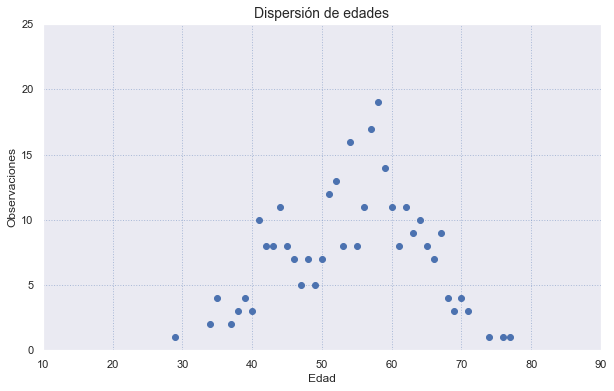

In [70]:
#Plot dispersión edades
df_edad = pd.DataFrame(data.edad.value_counts())

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_edad.index, y = df_edad.edad)
plt.grid(color='b', linestyle='dotted', linewidth=1, alpha=0.4)
plt.xticks(np.arange(10, 100, step=10))
plt.yticks(np.arange(0, 30, step=5))
plt.xlabel("Edad")
plt.ylabel("Observaciones")
plt.title('Dispersión de edades', fontsize=14)

plt.show();

sexo     0    1
target         
0       24  114
1       72   93


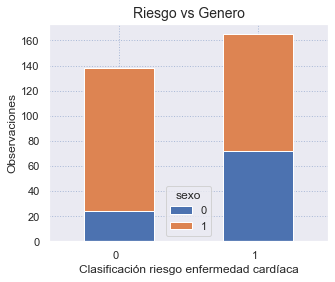

In [71]:
#Plot target vs sexo
counts = data.groupby(['target', 'sexo']).edad.count().unstack()
print(counts)

counts.plot(kind='bar', stacked=True)
plt.grid(color='b', linestyle='dotted', linewidth=1, alpha=0.4)
plt.rcParams["figure.figsize"] = (10, 5)
plt.xticks(rotation=0, ha='right')
plt.xlabel("Clasificación riesgo enfermedad cardíaca")
plt.ylabel("Observaciones")
plt.title('Riesgo vs Genero', fontsize=14);

dolor_pecho    0   1   2   3
target                      
0            104   9  18   7
1             39  41  69  16


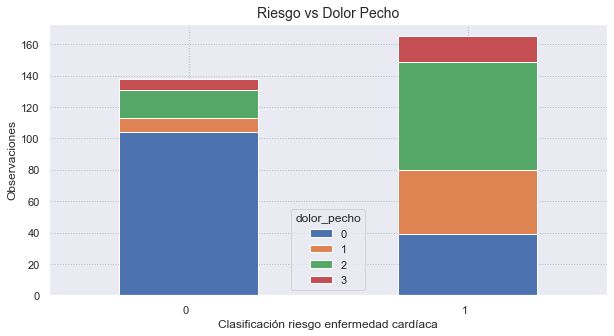

In [72]:
#Plot target vs dolor en el pecho
counts = data.groupby(['target', 'dolor_pecho']).edad.count().unstack()
print(counts)

counts.plot(kind='bar', stacked=True)
plt.grid(color='b', linestyle='dotted', linewidth=1, alpha=0.4)
plt.rcParams["figure.figsize"] = (10, 5)
plt.xticks(rotation=0, ha='right')
plt.xlabel("Clasificación riesgo enfermedad cardíaca")
plt.ylabel("Observaciones")
plt.title('Riesgo vs Dolor Pecho', fontsize=14);

nivel_azucar_sangre    0   1
target                      
0                    116  22
1                    142  23


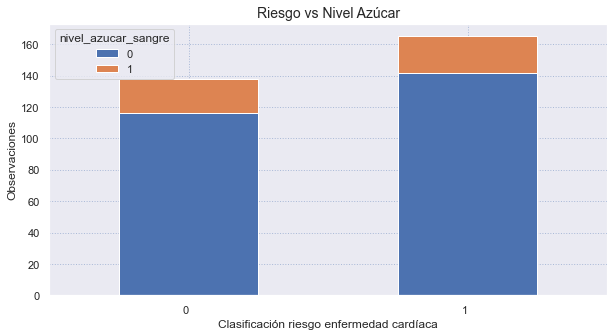

In [73]:
#Plot target vs nivel azúcar
counts = data.groupby(['target', 'nivel_azucar_sangre']).edad.count().unstack()
print(counts)

counts.plot(kind='bar', stacked=True)
plt.grid(color='b', linestyle='dotted', linewidth=1, alpha=0.4)
plt.rcParams["figure.figsize"] = (10, 5)
plt.xticks(rotation=0, ha='right')
plt.xlabel("Clasificación riesgo enfermedad cardíaca")
plt.ylabel("Observaciones")
plt.title('Riesgo vs Nivel Azúcar', fontsize=14);

resultados_electrocardio   0   1  2
target                             
0                         79  56  3
1                         68  96  1


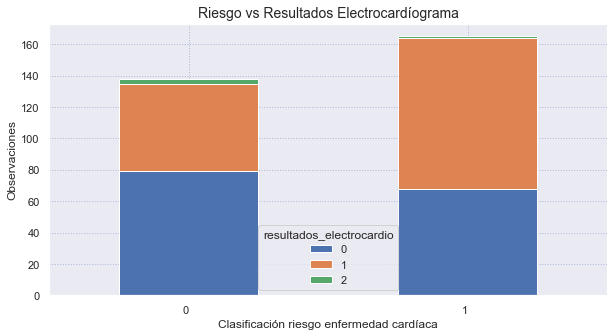

In [74]:
#Plot target vs nivel resultados electro
counts = data.groupby(['target', 'resultados_electrocardio']).edad.count().unstack()
print(counts)

counts.plot(kind='bar', stacked=True)
plt.grid(color='b', linestyle='dotted', linewidth=1, alpha=0.4)
plt.rcParams["figure.figsize"] = (10, 5)
plt.xticks(rotation=0, ha='right')
plt.xlabel("Clasificación riesgo enfermedad cardíaca")
plt.ylabel("Observaciones")
plt.title('Riesgo vs Resultados Electrocardíograma', fontsize=14);

angina_inducidad_por_ejercicio    0   1
target                                 
0                                62  76
1                               142  23


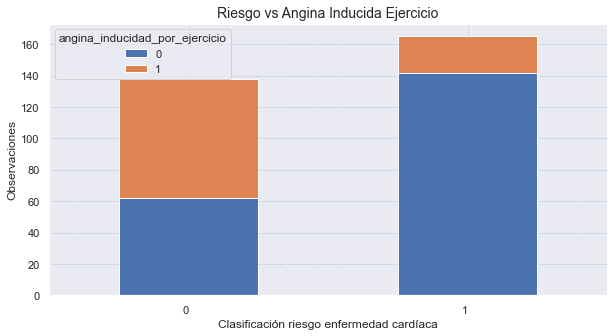

In [75]:
#Plot target vs nivel resultados electro
counts = data.groupby(['target', 'angina_inducidad_por_ejercicio']).edad.count().unstack()
print(counts)

counts.plot(kind='bar', stacked=True)
plt.grid(color='b', linestyle='dotted', linewidth=1, alpha=0.4)
plt.rcParams["figure.figsize"] = (10, 5)
plt.xticks(rotation=0, ha='right')
plt.xlabel("Clasificación riesgo enfermedad cardíaca")
plt.ylabel("Observaciones")
plt.title('Riesgo vs Angina Inducida Ejercicio', fontsize=14);

vasos_coloreados_fluor    0   1   2   3  4
target                                    
0                        45  44  31  17  1
1                       130  21   7   3  4


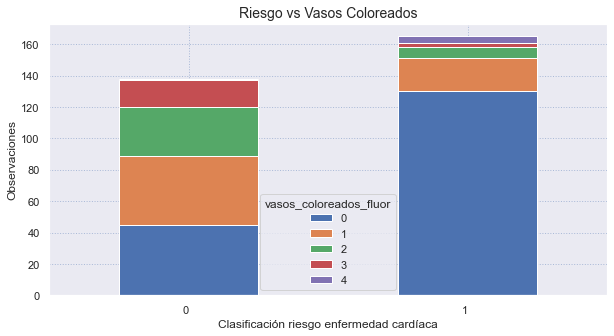

In [76]:
#Plot target vs nivel resultados electro
counts = data.groupby(['target', 'vasos_coloreados_fluor']).edad.count().unstack()
print(counts)

counts.plot(kind='bar', stacked=True)
plt.grid(color='b', linestyle='dotted', linewidth=1, alpha=0.4)
plt.rcParams["figure.figsize"] = (10, 5)
plt.xticks(rotation=0, ha='right')
plt.xlabel("Clasificación riesgo enfermedad cardíaca")
plt.ylabel("Observaciones")
plt.title('Riesgo vs Vasos Coloreados', fontsize=14);

thal    0   1    2   3
target                
0       1  12   36  89
1       1   6  130  28


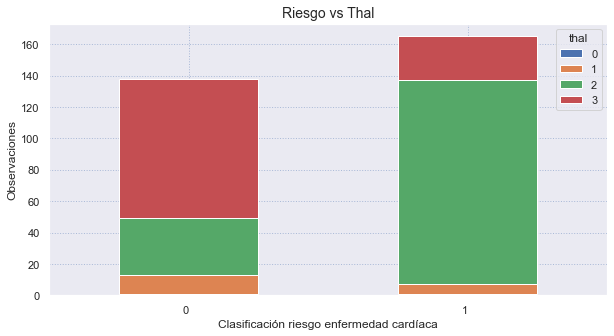

In [77]:
#Plot target vs nivel resultados electro
counts = data.groupby(['target', 'thal']).edad.count().unstack()
print(counts)

counts.plot(kind='bar', stacked=True)
plt.grid(color='b', linestyle='dotted', linewidth=1, alpha=0.4)
plt.rcParams["figure.figsize"] = (10, 5)
plt.xticks(rotation=0, ha='right')
plt.xlabel("Clasificación riesgo enfermedad cardíaca")
plt.ylabel("Observaciones")
plt.title('Riesgo vs Thal', fontsize=14);

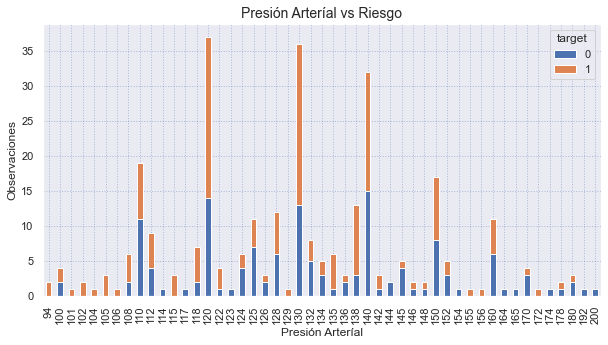

In [78]:
# Plot target vs presión

counts = data.groupby(['presion_arterial', 'target']).edad.count().unstack()

counts.plot(kind='bar', stacked=True)
plt.grid(color='b', linestyle='dotted', linewidth=1, alpha=0.4)
plt.xlabel("Presión Arteríal")
plt.ylabel("Observaciones")
plt.title('Presión Arteríal vs Riesgo', fontsize=14);

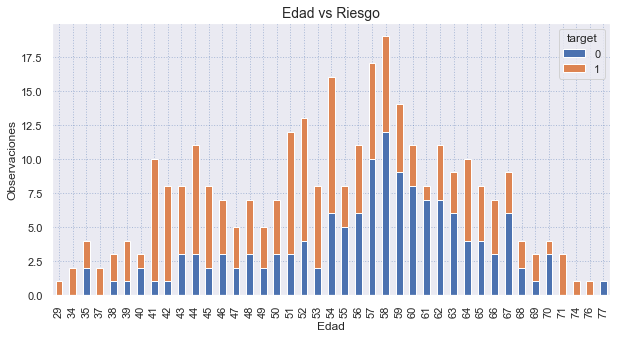

In [79]:
#Plot target vs edad

counts = data.groupby(['edad', 'target']).edad.count().unstack()
counts.plot(kind='bar', stacked=True)
plt.rcParams["figure.figsize"] = (15, 7)
plt.grid(color='b', linestyle='dotted', linewidth=1, alpha=0.4)
#plt.xticks(np.arange(0, 80, step=5))
plt.xlabel("Edad")
plt.ylabel("Observaciones")
plt.title('Edad vs Riesgo', fontsize=14);

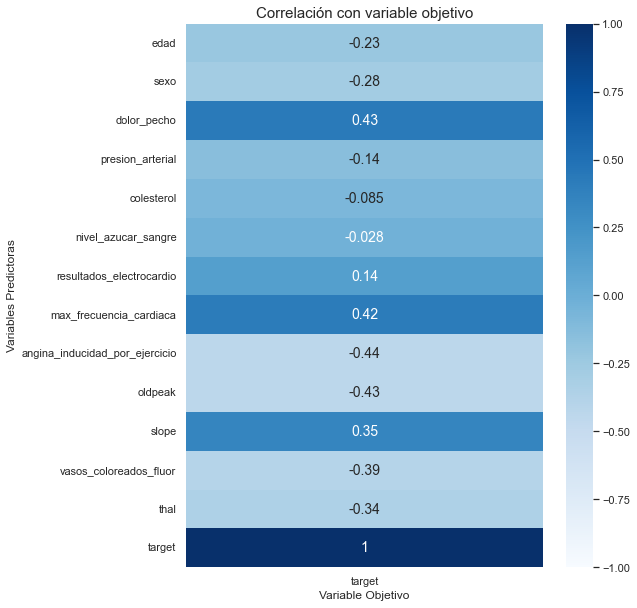

In [80]:
#Correlación entre las variables predictivas y variable target

sns.set(rc={'figure.figsize':(8,10)})
g=sns.heatmap(data.corr()[['target']], annot=True, vmin=-1, cmap='Blues', annot_kws = {'size':14})
g.set_xlabel( "Variable Objetivo" , size = 12 )  
g.set_ylabel( "Variables Predictoras" , size = 12)  
g.set_title( "Correlación con variable objetivo" , size = 15 );

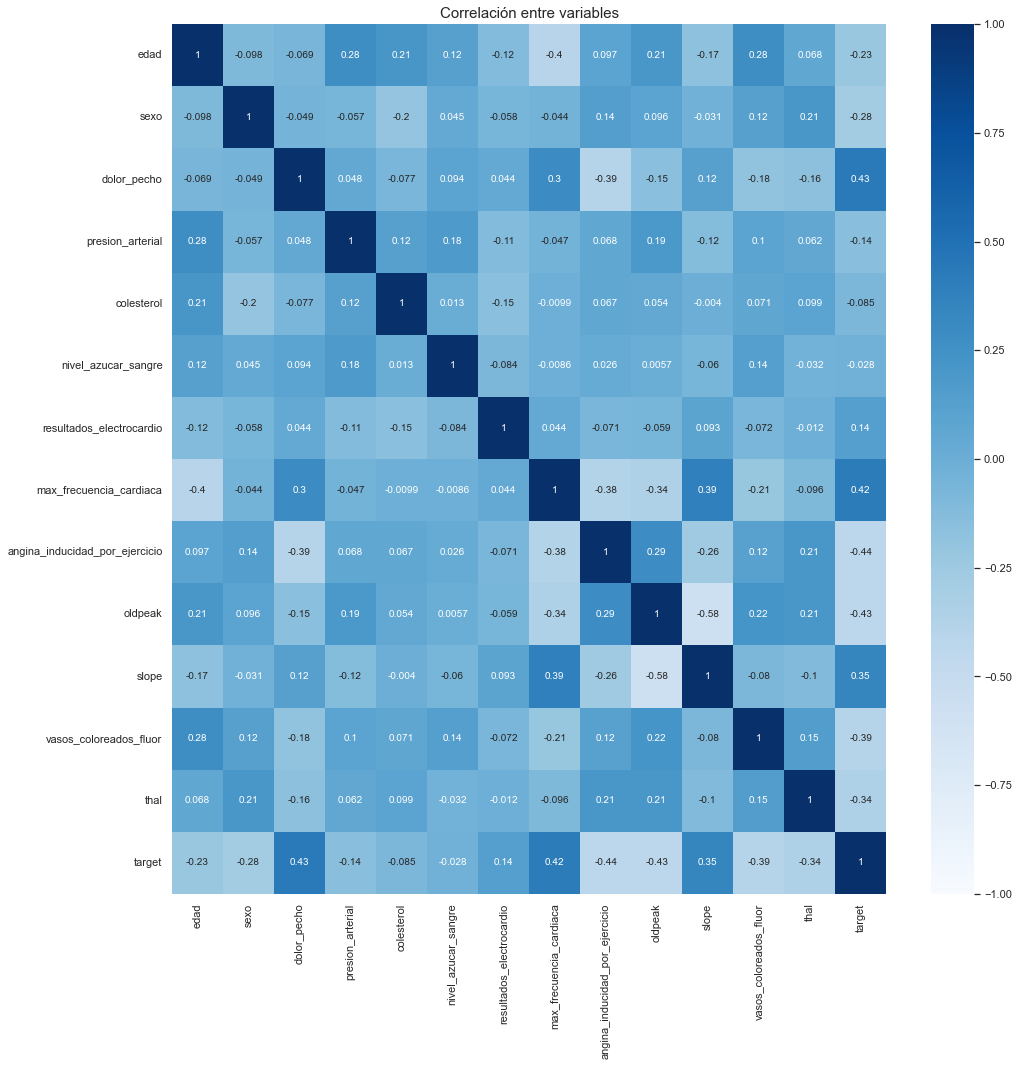

In [32]:
#Correlación entre las variables

sns.set(rc={'figure.figsize':(16,16)})
g=sns.heatmap(data.corr(), annot=True, vmin=-1, cmap='Blues', annot_kws = {'size':10})
#g.set_xlabel( "Variables" , size = 12 )  
#g.set_ylabel( "Variables" , size = 12)  
g.set_title( "Correlación entre variables" , size = 15 );

#### Naive Bayes GaussianNB

In [33]:
#1. Seleccionar una clase de modelo
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#2. Elegir hiperparametros del modelo, default
model = GaussianNB(var_smoothing=1e-9) 

In [34]:
#3. Preparar los datos en una matriz de features y un vector target
X = data.drop(columns=['target'], axis=1)
y = data["target"]

print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))

Shape X: (303, 13)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (303,)
Type y: <class 'pandas.core.series.Series'>


In [35]:
#4. Separar los sets de entrenamiento y de testeo
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=0)

# Verificamos que coincidan las proporciones del target
y_train.mean(), y_test.mean()
y_train.shape, y_test.shape

((227,), (76,))

In [36]:
#5. Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

GaussianNB()

In [37]:
#6. Predecir etiquetas para datos desconocidos
ypred = model.predict(X_test)
ypred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [38]:
#7. Evaluar la performance del modelo
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ypred).round(4)

0.8421

In [39]:
#verificamos parametros modelo
model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

Text(21.5, 0.5, 'Reales')

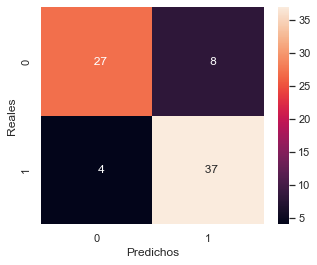

In [40]:
#matriz confusión
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_train, model.predict(X_train))

sns.set(rc={'figure.figsize':(5,4)})
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [41]:
#Impresión reporte calsificación peroformace modelo
print(classification_report(y_test, model.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.8710    0.7714    0.8182        35
           1     0.8222    0.9024    0.8605        41

    accuracy                         0.8421        76
   macro avg     0.8466    0.8369    0.8393        76
weighted avg     0.8447    0.8421    0.8410        76



#### Regresión Lógistica

In [42]:
# Estandarizamos los datos para que la regularización sea correcta
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [43]:
# Slección del modelo
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

# Y visualizamos los coeficientes
print(lr.coef_)
print(lr.intercept_)

[[-0.03632003 -0.6772317   0.89999957 -0.34976061 -0.23270325  0.05261852
   0.30294972  0.38427397 -0.61400973 -0.65297327  0.29796715 -0.68274501
  -0.60677996]]
[0.12308987]


In [44]:
#Con el modelo entrenado podemos comenzar a evaluar su performance y ver si podemos hacer algo para mejorarlo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, lr.predict(X_test_std))

0.868421052631579

Text(21.5, 0.5, 'Reales')

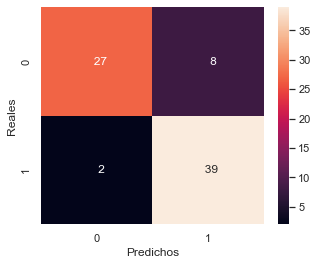

In [45]:
#plot matriz confusión
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_std)), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [46]:
#Evaluación performance modelo reporte calsificación
print(classification_report(y_test, lr.predict(X_test_std), digits=4))

              precision    recall  f1-score   support

           0     0.9310    0.7714    0.8438        35
           1     0.8298    0.9512    0.8864        41

    accuracy                         0.8684        76
   macro avg     0.8804    0.8613    0.8651        76
weighted avg     0.8764    0.8684    0.8667        76



In [47]:
#OPTIMIZACIÓN MODELO

In [48]:
#Se ajusta metrica umbral del modelo
umbral = 0.25 #CON ESTE UMBRAL SE PIERDE SENSIBILIDAD PERO SE MEJORA LA ESPECIFICIDAD QUE CORRESPONDE A PREDICCION DE EN RIESGO (VF)
probs = lr.predict_proba(X_train_std)[:,1]
y_pred_train = probs > umbral

accuracy_score(y_train, y_pred_train)

0.8237885462555066

Text(21.5, 0.5, 'Reales')

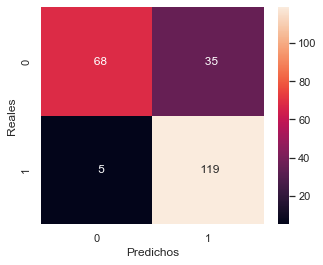

In [49]:
#Matriz de confución modelo óptimizado
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [50]:
#Evaluamos reporte de clasificación con los resultados del modelo óptimizado
print(classification_report(y_train, y_pred_train, digits=4))

              precision    recall  f1-score   support

           0     0.9315    0.6602    0.7727       103
           1     0.7727    0.9597    0.8561       124

    accuracy                         0.8238       227
   macro avg     0.8521    0.8099    0.8144       227
weighted avg     0.8448    0.8238    0.8183       227



#### KNN

In [51]:
#Selección del modelo
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=5)

# Lo ajustamos sobre datos de entrenamiento
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
# Evaluamos qué accuracy obtenemos en train
accuracy_score(y_train, knn.predict(X_train))

0.7577092511013216

In [54]:
# Lo utilizamos para predecir en test
y_pred = knn.predict(X_test)

In [55]:
# Computamos el accuracy score en test
accuracy_score(y_test, y_pred).round(4)

0.6974

Text(21.5, 0.5, 'Reales')

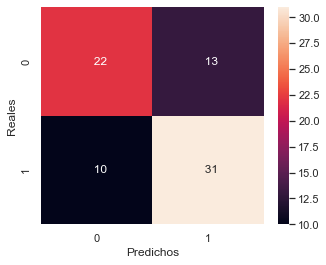

In [56]:
# Graficamos la matriz de confusión
#plor matriz confusión
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test)), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [57]:
#Evaluamos reporte de clasificación con los resultados del modelo
print(classification_report(y_test, knn.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.6875    0.6286    0.6567        35
           1     0.7045    0.7561    0.7294        41

    accuracy                         0.6974        76
   macro avg     0.6960    0.6923    0.6931        76
weighted avg     0.6967    0.6974    0.6959        76



In [58]:
#OPTIMIZACIÓN MODELO

In [59]:
# Calculamos los scores de cross validation,
# pero esta vez sobre los features estandarizados:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=0)

scores_para_df_standard = []

for i in range(1, 21):
    KNN = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(KNN, X_train, y_train, cv=kf)
    dict_row_score = {'score_medio':np.mean(cv_scores),
                      'score_std':np.std(cv_scores), 'n_neighbors':i}
    scores_para_df_standard.append(dict_row_score)

In [60]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores_standard = pd.DataFrame(scores_para_df_standard)
df_scores_standard.head()

import dataframe_image as dfi
df_styled = df_scores_standard.style.background_gradient()
dfi.export(df_scores_standard, "scoresK.png")

In [61]:
# Armamos nuevamente los límites para graficar
df_scores_standard['limite_superior'] = df_scores_standard['score_medio'] + df_scores_standard['score_std']
df_scores_standard['limite_inferior'] = df_scores_standard['score_medio'] - df_scores_standard['score_std']
df_scores_standard.head(6)

,score_medio,score_std,n_neighbors,limite_superior,limite_inferior
0,0.520483,0.064995,1,0.585478,0.455489
1,0.520290,0.074933,2,0.595222,0.445357
2,0.595556,0.092976,3,0.688532,0.502580
3,0.560000,0.076675,4,0.636675,0.483325
4,0.626280,0.069467,5,0.695747,0.556813
5,0.595072,0.069311,6,0.664384,0.525761


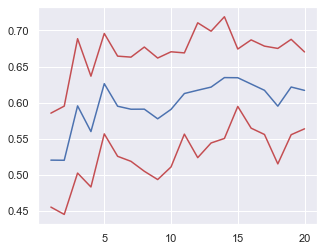

In [62]:
# Graficamos los resultados
plt.plot(df_scores_standard['n_neighbors'], df_scores_standard['limite_inferior'], color='r')
plt.plot(df_scores_standard['n_neighbors'], df_scores_standard['score_medio'], color='b')
plt.plot(df_scores_standard['n_neighbors'], df_scores_standard['limite_superior'], color='r');

In [63]:
# Identificamos el score máximo
df_scores_standard.loc[df_scores_standard.score_medio == df_scores_standard.score_medio.max()]

,score_medio,score_std,n_neighbors,limite_superior,limite_inferior
13,0.634686,0.08421,14,0.718896,0.550476


In [64]:
# Asignamos el valor del k óptimo a una variable
best_k = df_scores_standard.loc[df_scores_standard.score_medio == df_scores_standard.score_medio.max(), 'n_neighbors'].values[0]
best_k

14

In [65]:
# Elegimos el modelo óptimo de acuerdo a las pruebas de cross validation
best_KNN = KNeighborsClassifier(n_neighbors=best_k)

# Lo ajustamos sobre los datos de entrenamiento
best_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [66]:
# computamos matriz utilizando el método del accuracy score modelo óptimizado
accuracy_score(y_test, best_KNN.predict(X_test)).round(2)

0.74

Text(21.5, 0.5, 'Reales')

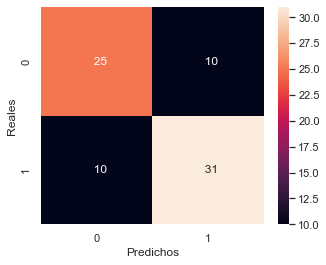

In [67]:
# Graficamos la matriz de confusión
#plor matriz confusión
sns.heatmap(confusion_matrix(y_test, best_KNN.predict(X_test)), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [68]:
#Evaluamos reporte de clasificación con los resultados del modelo óptimizado
print(classification_report(y_test, best_KNN.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.7143    0.7143    0.7143        35
           1     0.7561    0.7561    0.7561        41

    accuracy                         0.7368        76
   macro avg     0.7352    0.7352    0.7352        76
weighted avg     0.7368    0.7368    0.7368        76



#### De acuerdo a los resultados anteriores el mejor modelo de aclasificación supervisado es REGRESIÓN LÓGISTICA, ajustando
#### el umbral de precisión al 0.25. Con el umbral por defecto la sensibilidad es del 95%.
#### Sí bien no es el mejor accuracy, persenta una sensibilidad del 96%, es decir, que es capaz de predecir
#### 96 casos de 100 de personas que tienen riesgo de enfermedad cardíaca,
#### para el conjunto de datos de entrenamiento predijo 119 casos en riesgo de 124 en total
#### para el conjunto de datos de test predijo 37 casos en riego de 39, es decir, sólo 2 falsos positivos.